# Basic Plotting

### recover matplotlib defaults 

import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

%pylab inline

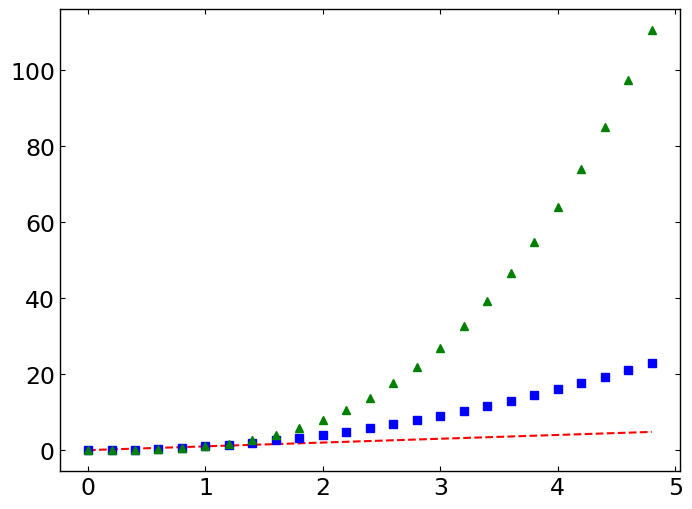

In [1]:
# recover matplotlib defaults 
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
#%pylab inline

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
#plt.show()
#plt.savefig('tmp.eps')

Text(0, 0.5, 'hey')

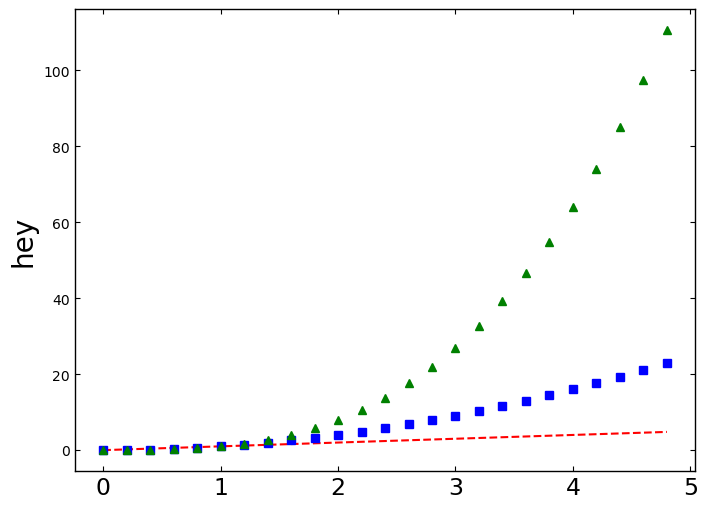

In [2]:
""" fontsize """

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0.,5.,0.2)

fig, ax = plt.subplots()

ax.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')

plt.yticks(fontsize=10)
ax.set_ylabel('hey',fontsize=20)

### dark background

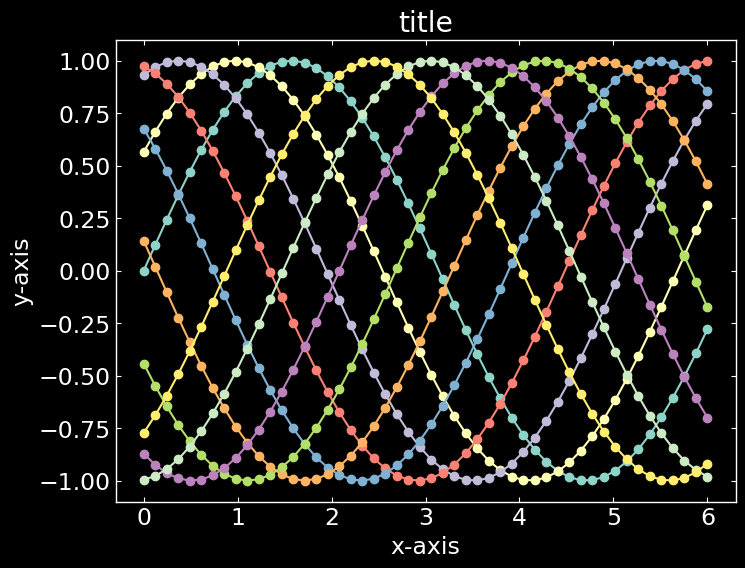

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    plt.plot(x, np.sin(x + s), 'o-')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('title')

plt.show()

### save figures

Note that matplotlib.use('Agg') is not compatible with "%pylab inline". But without the option, we can save the figure as png, eps, pdf.

In [4]:
""" recover matplotlib defaults """
import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update(mpl.rcParamsOrig)
%matplotlib inline

print(mpl.matplotlib_fname())

/Users/astrodoo/.matplotlib/matplotlibrc


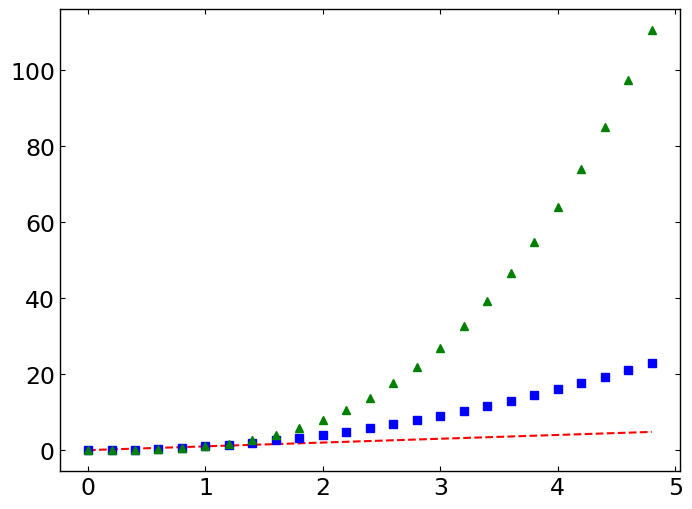

In [5]:
# recover matplotlib defaults 
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
#%pylab inline

import matplotlib
#matplotlib.use('Agg')
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
#plt.show()
#plt.savefig('../figures/test.png')
#plt.savefig('../figures/test.eps')

# Multiplots

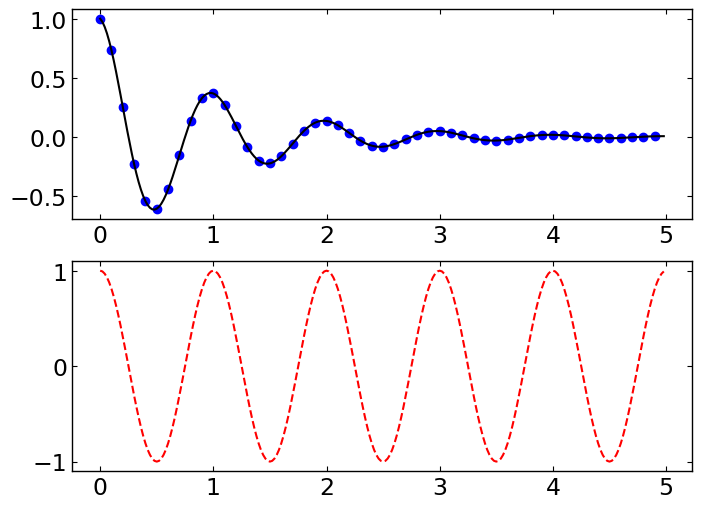

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t)*np.cos(2.*np.pi*t)

t1 = np.arange(0.,5.,0.1)
t2 = np.arange(0.,5.,0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1,f(t1),'bo',t2,f(t2),'k')

plt.subplot(212)
plt.plot(t2,np.cos(2.*np.pi*t2),'r--')

# set the number of ticks
# if the plot is log scale:
# > plt.locator_params(axis='y',numticks=3)
# for the ticks in colorbar, you should check matplotlib3.ipynb
plt.locator_params(axis='y',nbins=3)     
plt.show()

## shared x & y label on multiple plots; managing multiple plots manually

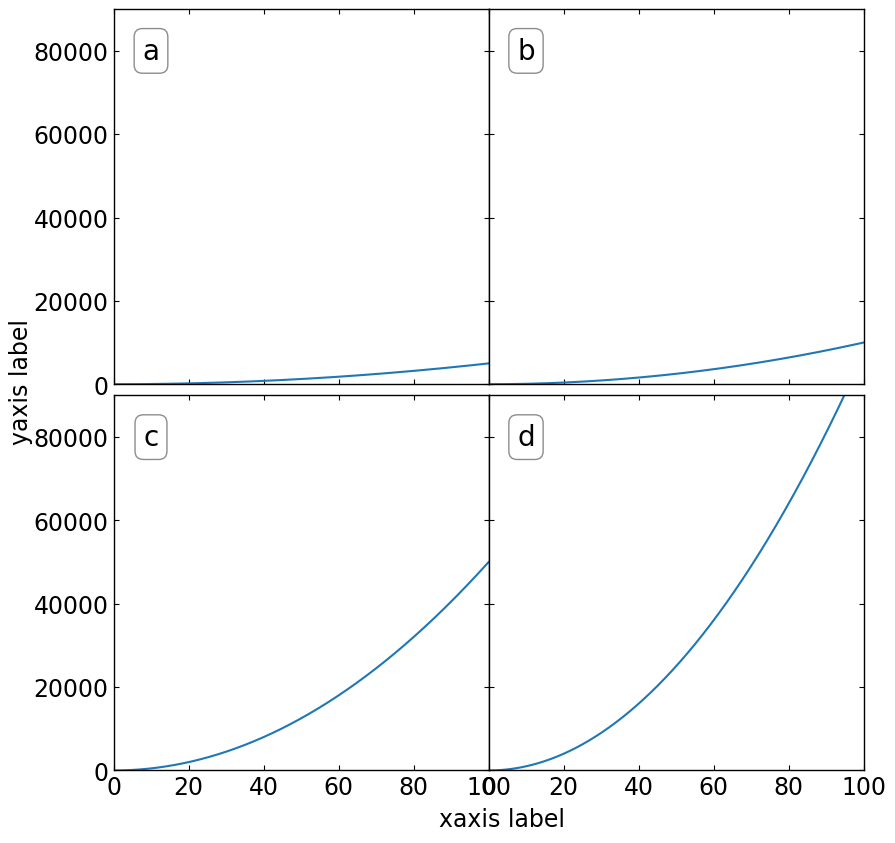

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

xlim = [0,100]
ylim = [0,90000]

x = np.linspace(0,100,5000)
y1 = x**2/2.
y2 = x**2
y3 = x**2*5
y4 = x**2*10

# subplots configuration  (position should be converted to normal scale)
pltx0=[30.,10.]; plty0=[20.,10.]   # margin left & right
pltxw=0.; pltyw=3.                # x(horizontal), y(vertical) gap
pltxs=100.; pltys=100.             # plot size
winxs=np.sum(pltx0)+2*pltxs+pltxw; winys=np.sum(plty0)+2*pltys+pltyw

fig = plt.figure(figsize=(9,9*winys/winxs))

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

# first plot
ax1  = fig.add_subplot(221)
ax1.plot(x,y1)
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])
ax1.text(10, 80000, "a", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax1.get_xticklabels(), visible=False)

# second plot
ax2  = fig.add_subplot(222, sharey=ax1)
ax2.plot(x,y2)
ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ylim[0], ylim[1])
ax2.text(10, 80000, "b", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.subplots_adjust(wspace=pltxw/pltxs)

# third plot
ax3  = fig.add_subplot(223, sharex=ax1)
ax3.plot(x,y3)
ax3.set_xlim(xlim[0], xlim[1])
ax3.set_ylim(ylim[0], ylim[1])
ax3.text(10, 80000, "c", ha="center", va="center", size=20,
        bbox=bbox_props)

#plt.subplots_adjust(hspace=pltyw/pltys)

# forth plot
ax4  = fig.add_subplot(224, sharex=ax2, sharey=ax3)
ax4.plot(x,y4)
ax4.set_xlim(xlim[0], xlim[1])
ax4.set_ylim(ylim[0], ylim[1])
ax4.text(10, 80000, "d", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax4.get_yticklabels(), visible=False)
#plt.subplots_adjust(hspace=pltyw/pltys, wspace=pltxw/pltxs)

# set the figure label
plt.annotate('yaxis label',(0.01,0.6),xycoords='figure fraction',rotation='vertical')
plt.annotate('xaxis label',(0.49,0.02),xycoords='figure fraction')

# adjust margin
fig.subplots_adjust(left=pltx0[0]/winxs,right=1-pltx0[1]/winxs,bottom=plty0[0]/winys,top=1-plty0[1]/winys \
                   ,hspace=pltyw/pltys, wspace=pltxw/pltxs)

# save the figure

#fig.savefig('test.eps')

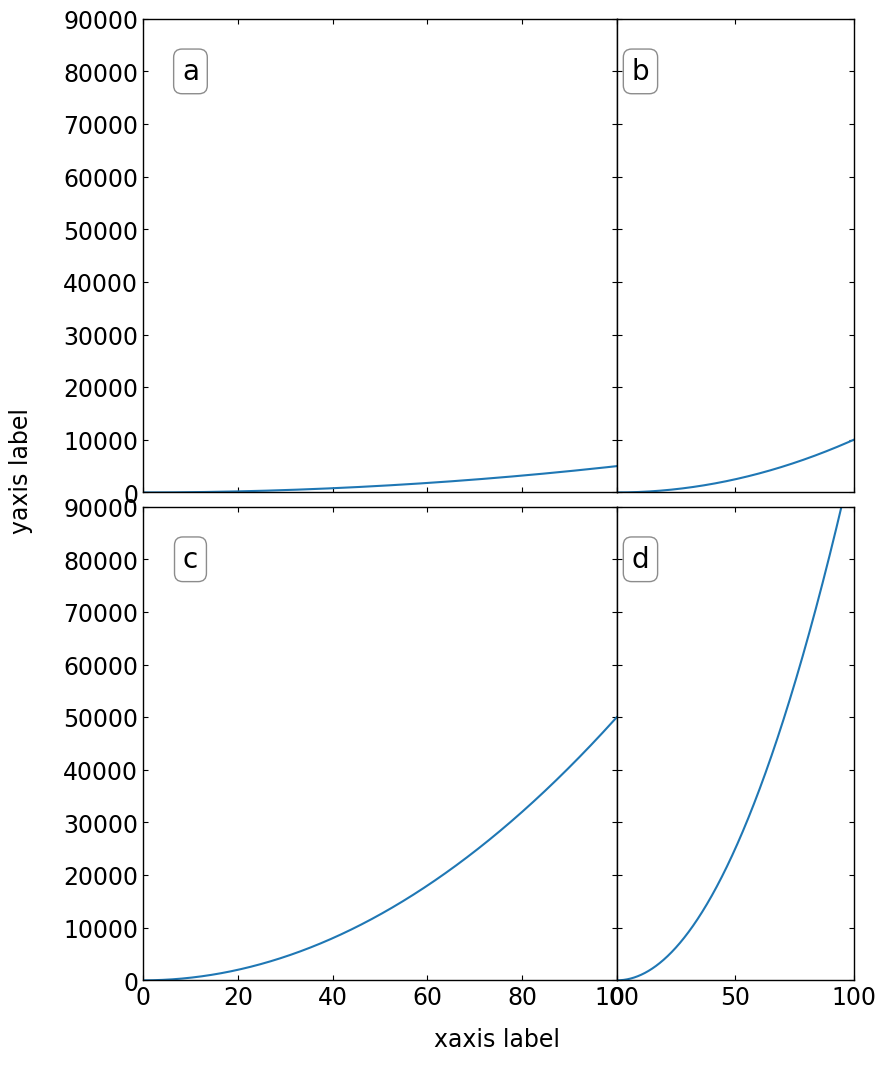

In [3]:
""" Another way of drawing multiple plots """

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

xlim = [0,100]
ylim = [0,90000]

x = np.linspace(0,100,5000)
y1 = x**2/2.
y2 = x**2
y3 = x**2*5
y4 = x**2*10

# subplots configuration  (position should be converted to normal scale)
pltx0=[30.,10.]; plty0=[20.,10.]   # margin left & right
pltxw=0.; pltyw=3.                # x(horizontal), y(vertical) gap
pltxs1=100.; pltxs2=50. 
pltys=100.             # plot size
winxs=np.sum(pltx0)+pltxs1+pltxs2+pltxw; winys=np.sum(plty0)+2*pltys+pltyw

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

# definition for the axes
left1, width1 = pltx0[0]/winxs, pltxs1/winxs
left2, width2 = (pltx0[0]+pltxs1+pltxw)/winxs, pltxs2/winxs
bottom1, height1 = (plty0[0]+pltys+pltyw)/winys, pltys/winys
bottom2, height2 = plty0[0]/winys, pltys/winys

# axes positions
# [ 1,1  2,1 
#   1,2  2,2 ]

plt.figure(figsize=(9,9*winys/winxs))

# first plot
ax1  = plt.axes([left1,bottom1,width1,height1])
ax1.plot(x,y1)
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])
ax1.text(10, 80000, "a", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax1.get_xticklabels(), visible=False)

# second plot
ax2  = plt.axes([left2,bottom1,width2,height1])
ax2.plot(x,y2)
ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ylim[0], ylim[1])
ax2.text(10, 80000, "b", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.subplots_adjust(wspace=pltxw/pltxs)

# third plot
ax3  = plt.axes([left1,bottom2,width1,height2])
ax3.plot(x,y3)
ax3.set_xlim(xlim[0], xlim[1])
ax3.set_ylim(ylim[0], ylim[1])
ax3.text(10, 80000, "c", ha="center", va="center", size=20,
        bbox=bbox_props)

#plt.subplots_adjust(hspace=pltyw/pltys)

# forth plot
ax4  = plt.axes([left2,bottom2,width2,height2])
ax4.plot(x,y4)
ax4.set_xlim(xlim[0], xlim[1])
ax4.set_ylim(ylim[0], ylim[1])
ax4.text(10, 80000, "d", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax4.get_yticklabels(), visible=False)
#plt.subplots_adjust(hspace=pltyw/pltys, wspace=pltxw/pltxs)

# set the figure label
plt.annotate('yaxis label',(0.01,0.6),xycoords='figure fraction',rotation='vertical')
plt.annotate('xaxis label',(0.49,0.02),xycoords='figure fraction')

## Dual axes: twinx, tinwy, secondary axis

Demonstrate how to do two plots on the same axes with different left
right scales.


The trick is to use *2 different axes*.  Turn the axes rectangular
frame off on the 2nd axes to keep it from obscuring the first.
Manually set the tick locs and labels as desired.  You can use
separate matplotlib.ticker formatters and locators as desired since
the two axes are independent.

This is achieved in the following example by calling the Axes.twinx()
method, which performs this work. See the source of twinx() in
axes.py for an example of how to do it for different x scales. (Hint:
use the xaxis instance and call tick_bottom and tick_top in place of
tick_left and tick_right.)

The twinx and twiny methods are also exposed as pyplot functions.

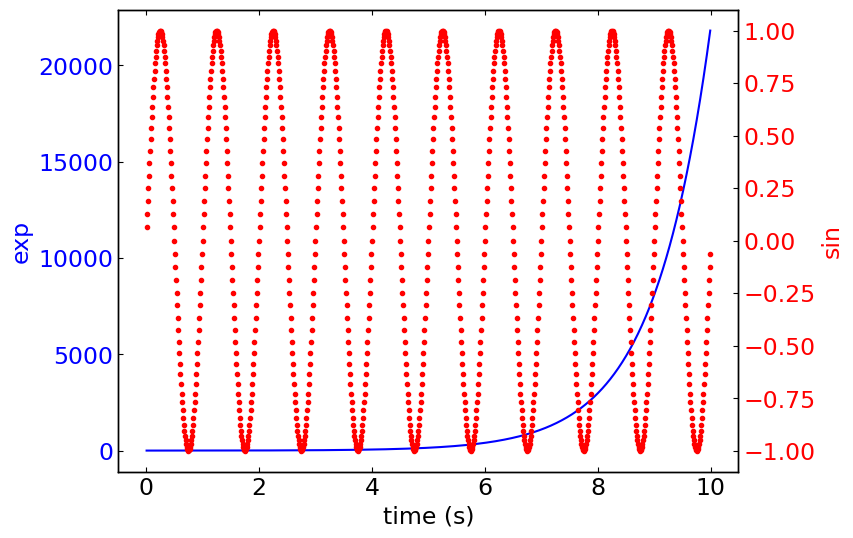

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

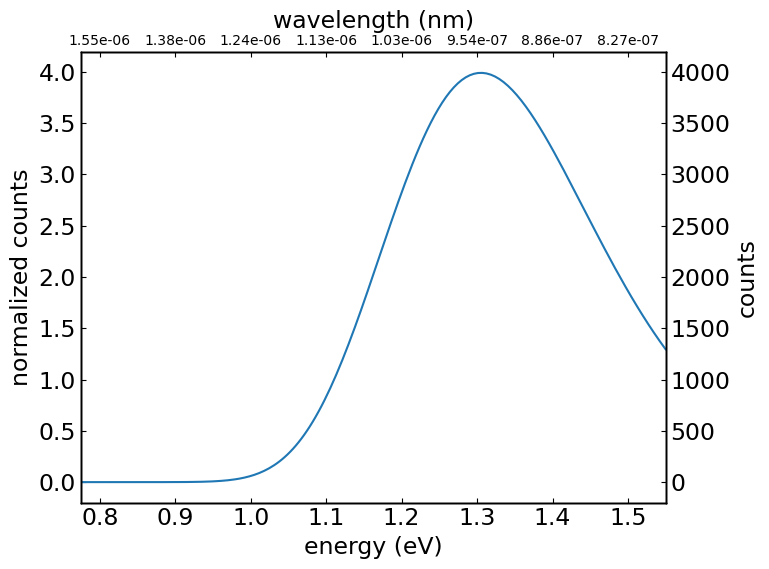

In [9]:
""" scaling the tick for the data with different units """

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.constants import h, c, e

%matplotlib inline

def E(wavelength):
    return (h*c)/(wavelength*e)
def getWaveLength(energy):
    return (h*c)/(energy*e)
def getCounts(normcounts):
    return normcounts*1000

wavelen = np.linspace(800e-9,1600e-9,200)
E_eV = E(wavelen)
loc, scale = 950e-9, 3.0
#counts = mlab.normpdf(wavelen,950e-9,100e-9)/100
counts = norm.pdf(wavelen,950e-9,100e-9)/100
counts_norm = counts/10000

fig, ax1  = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twiny()

plt.ticklabel_format(style='sci', scilimits=(0,0))

ax1.plot(E_eV, counts_norm)
ax1.set_xlim(E(1600e-9),E(800e-9))
ax1.set_ylabel('normalized counts')
ax1.set_xlabel('energy (eV)')
ax2.set_ylabel('counts')
ax3.set_xlabel('wavelength (nm)')
ax3.ticklabel_format(style='plain')

# get the primary axis x tick locations in plot units
xtickloc = ax1.get_xticks() 
# set the second axis ticks to the same locations
ax3.set_xticks(xtickloc)
# calculate new values for the second axis tick labels, format them, and set them
x2labels = ['{:.3g}'.format(x) for x in getWaveLength(xtickloc)]
ax3.set_xticklabels(x2labels,fontsize=10)
# force the bounds to be the same
ax3.set_xlim(ax1.get_xlim()) 

#same for y
ytickloc = ax1.get_yticks()
ax2.set_yticks(ytickloc)
ax2.set_yticklabels([str(int(y)) for y in getCounts(ytickloc)])
ax2.set_ylim(ax1.get_ylim())

plt.tight_layout()

Text(0.5, 0, 'Modified x-axis: $1/(1+X)$')

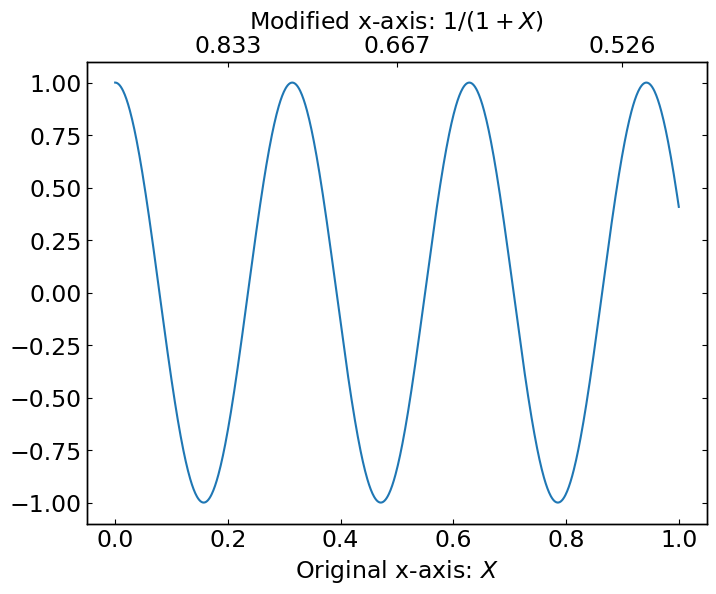

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = np.linspace(0,1,1000)
Y = np.cos(X*20)

ax1.plot(X,Y)
ax1.set_xlabel(r"Original x-axis: $X$")

new_tick_locations = np.array([.2, .5, .9])

def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

[Text(0, 1, '7'), Text(0, 1, '8'), Text(0, 1, '99')]

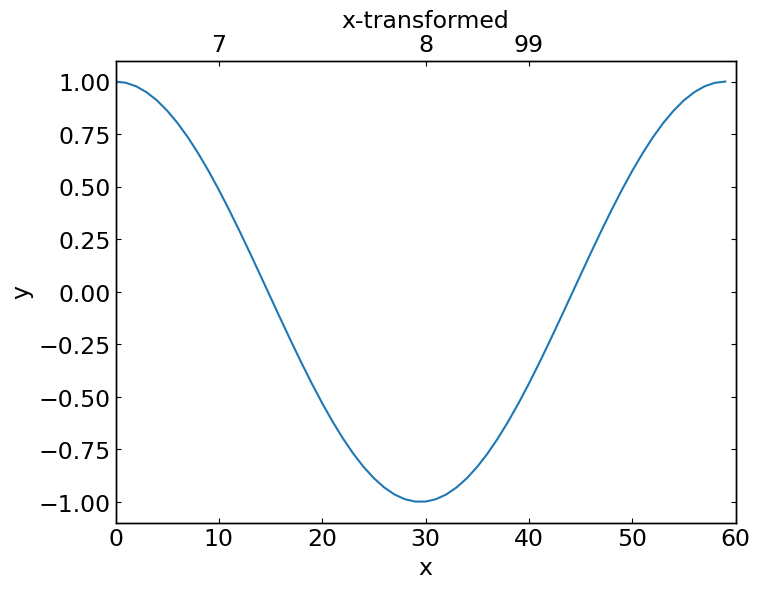

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

a = np.cos(2*np.pi*np.linspace(0, 1, 60))
ax1.plot(range(60), a)

ax1.set_xlim(0, 60)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = ax1.twiny()
ax2.set_xlabel("x-transformed")
ax2.set_xlim(0, 60)
ax2.set_xticks([10, 30, 40])
ax2.set_xticklabels(['7','8','99'])

Text(0.5, 0, '1/(x+1)')

<ipython-input-73-a1e8317ec211>:16: RuntimeWarning: divide by zero encountered in true_divide
  invers = lambda x: 1/x-1


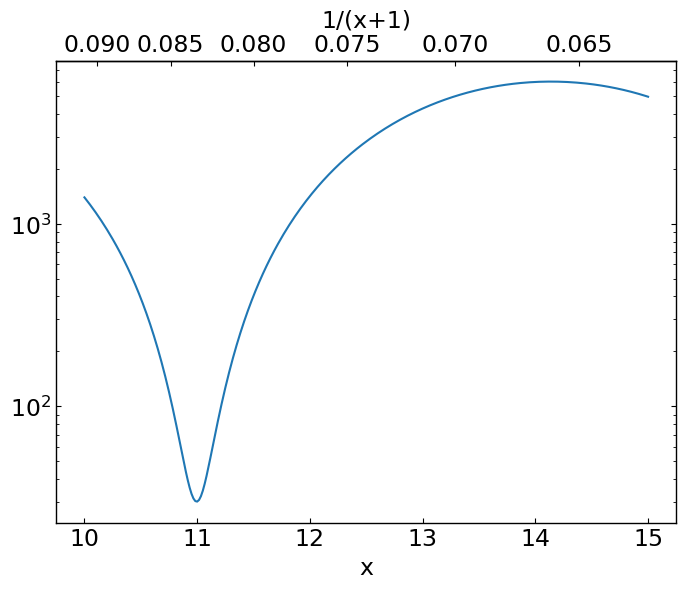

In [73]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10,15, num=301)
y = (np.sin(x)+1.01)*3000

fig, ax = plt.subplots()

ax.semilogy(x, y, label='DM')
ax.set_xlabel("x")

ax.tick_params(top=False)
#secondary axis
# Define function and its inverse
trans  = lambda x: 1/(1+x)
invers = lambda x: 1/x-1

ax2 = ax.secondary_xaxis("top", functions=(trans,invers))
ax2.set_xlabel("1/(x+1)")


## Log scale

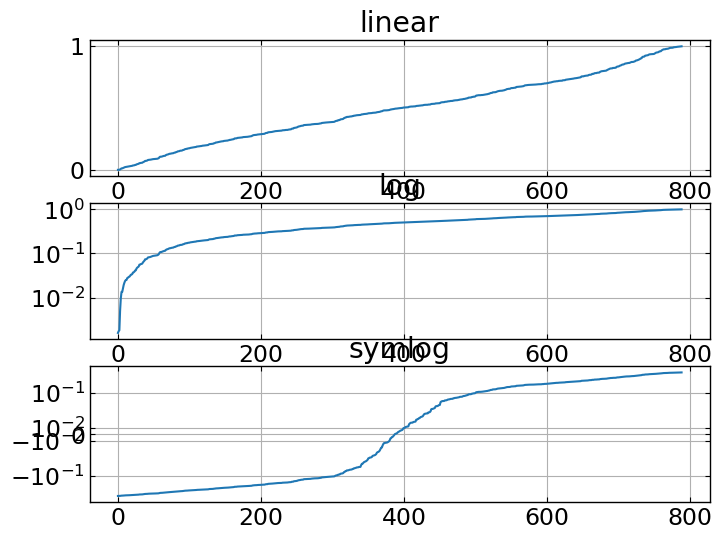

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y>0) & (y<1)]
y.sort()
x = np.arange(len(y))

plt.figure(1)

#linear plot
plt.subplot(311)
plt.plot(x,y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

#log
plt.subplot(312)
plt.plot(x,y)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.locator_params(axis='y',numticks=4)     # Note that in log scale, the number of ticks -> numticks (no nbins) 

#symmetric log
plt.subplot(313)
plt.plot(x,y-y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)
#plt.locator_params(axis='y',numticks=4)

plt.show()

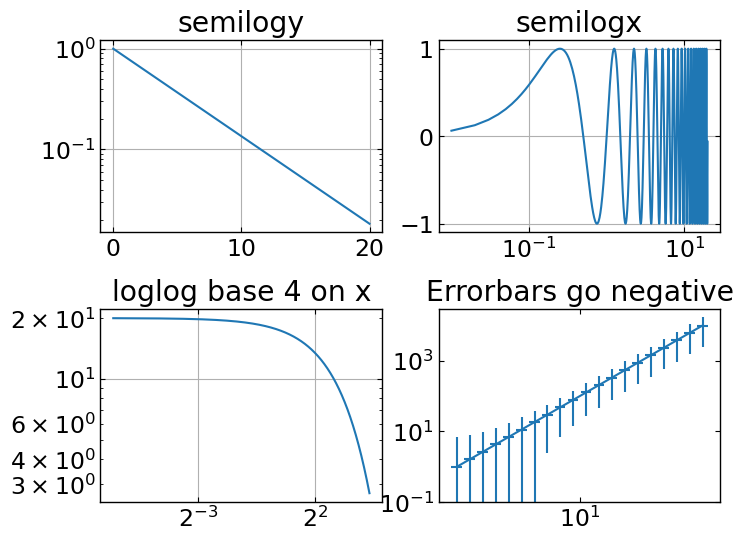

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 4 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

# imshow (2D map)

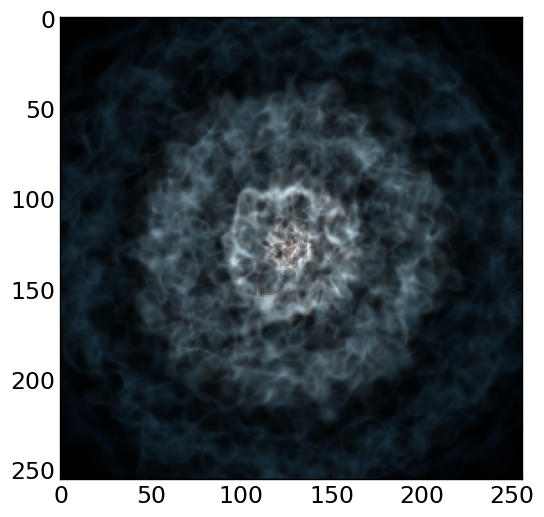

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

img = mpimg.imread('../figures/test_rendering.png')
imgplot = plt.imshow(img)

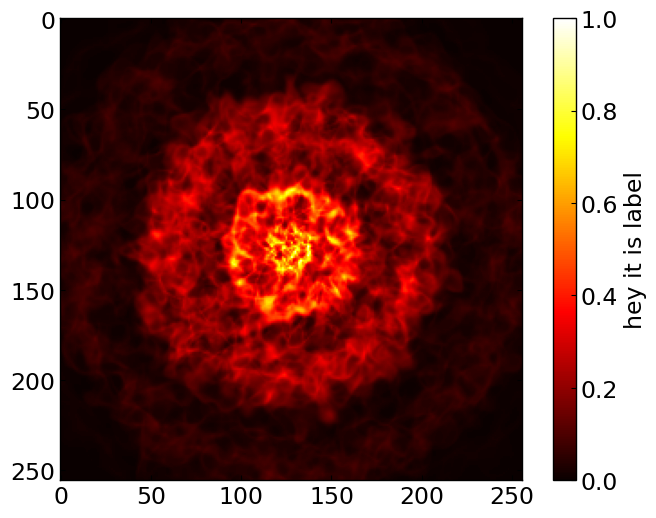

In [24]:
lum_img = img[:,:,0]
imgplot2 = plt.imshow(lum_img)
imgplot2.set_cmap('hot')
plt.colorbar(label='hey it is label')

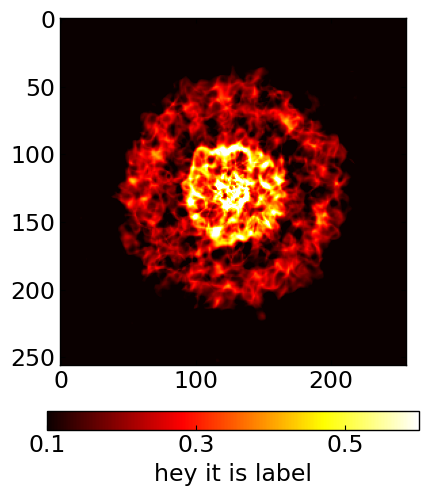

In [25]:
imgplot2 = plt.imshow(lum_img)
imgplot2.set_cmap('hot')
imgplot2.set_clim(0.1,0.6)
clb = plt.colorbar(imgplot2,orientation='horizontal', label='hey it is label' \
                   ,aspect=20,shrink=0.6,pad=0.1 \
                   ,ticks=[i*0.2+0.1 for i in range(3)])

Text(0.3, 2.0, 'hey it is label')

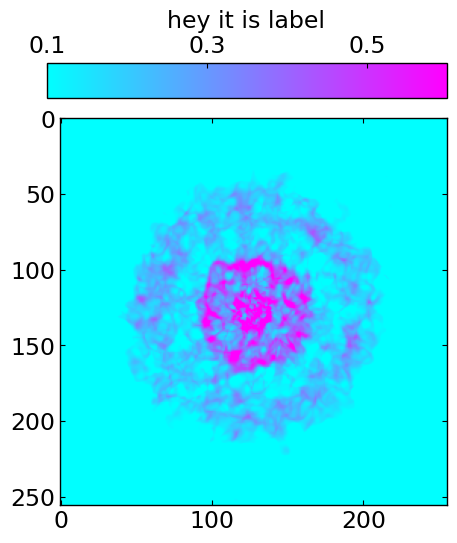

In [26]:
""" draw colorbar in manual way - position, width """

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(5,7))

cmap1 = mpl.cm.cool
minv, maxv = 0.1, 0.6

img = mpimg.imread('../figures/test_rendering.png')
imgplot = plt.imshow(img[:,:,0])
imgplot.set_cmap(cmap1)
imgplot.set_clim(minv,maxv)

# axis for color bar
ax1 = fig.add_axes([0.1,0.8,0.8,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.Normalize(vmin=minv, vmax=maxv)
clb = mpl.colorbar.ColorbarBase(ax1,orientation='horizontal' \
                               ,norm=norm,cmap=cmap1 \
                               ,ticks=[i*0.2+0.1 for i in range(3)])
ax1.xaxis.set_ticks_position("top")
ax1.annotate('hey it is label',(0.3,2.),xycoords='axes fraction')

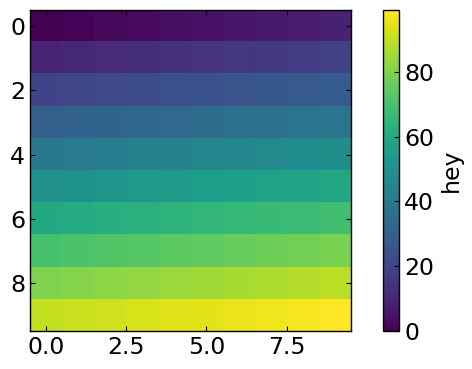

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

arr = np.arange(100).reshape((10,10))

plt.close('all')
fig = plt.figure(figsize=(5,4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation='none')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right","5%",pad="10%")
cab = plt.colorbar(im, cax=cax)
cab.set_label('hey')

plt.tight_layout()

plt.show()

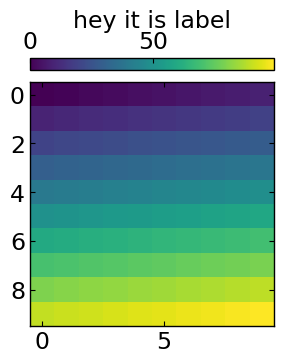

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

arr = np.arange(100).reshape((10,10))

plt.close('all')
fig = plt.figure(figsize=(5,4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation='none')

""" This allows to fit the color bar with the size of figure """
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("top","5%",pad="5%")
cab = plt.colorbar(im, cax=cax,orientation='horizontal')
cax.xaxis.set_ticks_position('top')
#cab.set_label('hey')
cax.annotate('hey it is label',(0.5,3.5),xycoords='axes fraction',ha='center')

plt.tight_layout()

plt.show()

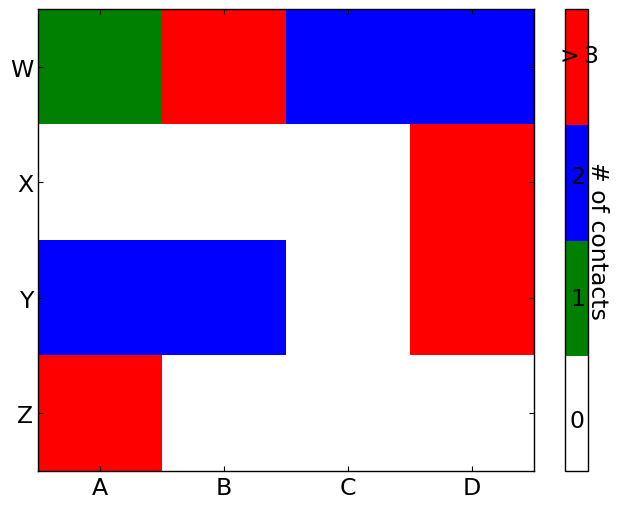

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#discrete color scheme
cMap = ListedColormap(['white', 'green', 'blue','red'])

#data
np.random.seed(42)
data = np.random.rand(4, 4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=cMap)

#legend
cbar = plt.colorbar(heatmap)

cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['$0$','$1$','$2$','$>3$']):
    cbar.ax.text(.5, (2 * j + 1) / 8.0, lab, ha='center', va='center')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('# of contacts', rotation=270)


# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

#lebels
column_labels = list('ABCD')
row_labels = list('WXYZ')
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

plt.show()

# Legend

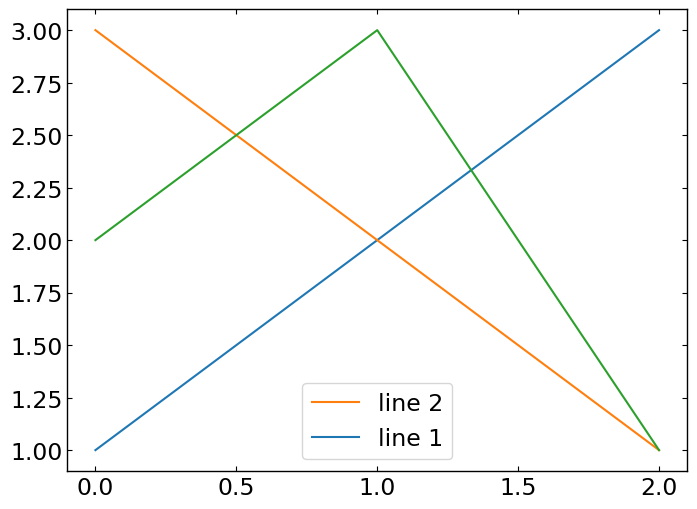

In [33]:
""" manage the label sequence in legend: 1st method """

import matplotlib.pyplot as plt
%matplotlib inline

p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
p3, = plt.plot([2,3,1])
plt.legend([p2,p1],['line 2','line 1'])

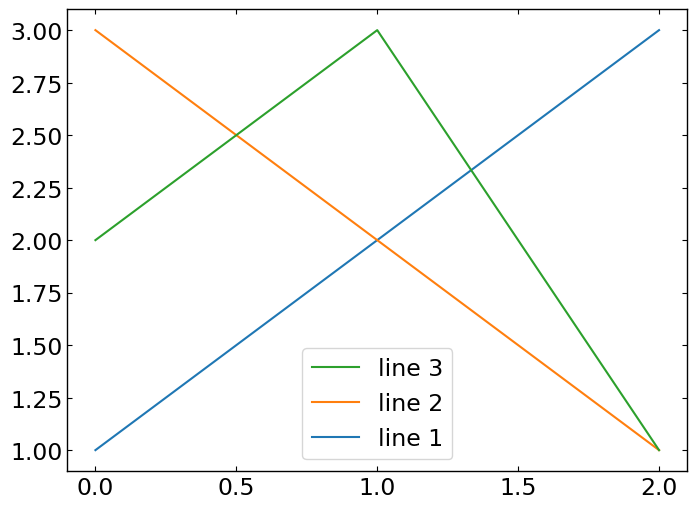

In [34]:
""" manage the label sequence in legend: 2nd method """

ax = plt.subplot(111)
ax.plot([1,2,3], label="line 1")
ax.plot([3,2,1], label="line 2")
ax.plot([2,3,1], label="line 3")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

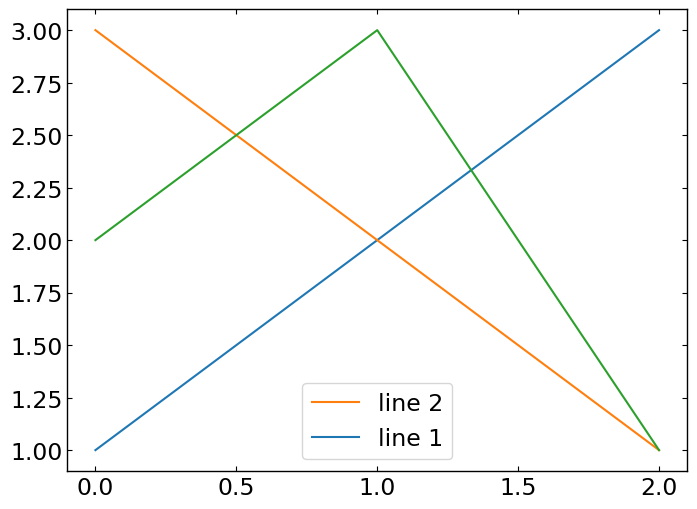

In [35]:
""" manage the label sequence in legend: 2nd-2 method """

ax = plt.subplot(111)
p1, = ax.plot([1,2,3], label="line 1")
p2, = ax.plot([3,2,1], label="line 2")
p3, = ax.plot([2,3,1], label="line 3")

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1],handles[0]], [labels[1],labels[0]])

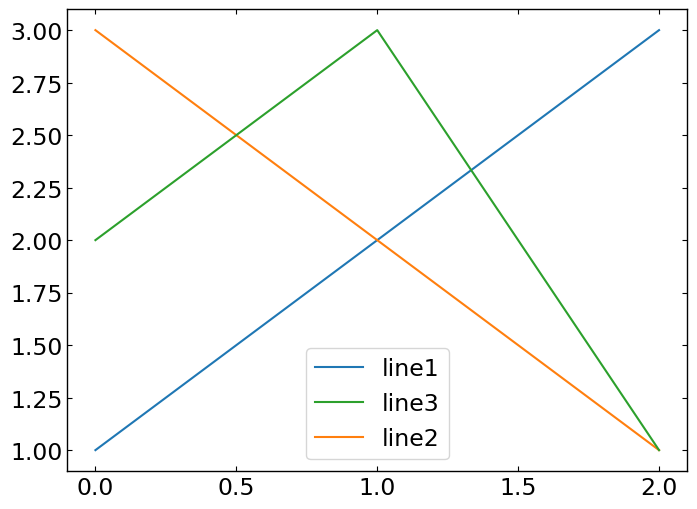

In [36]:
""" manage the label sequence in legend: 3rd method """

import matplotlib.pyplot as plt
%matplotlib inline

p1, = plt.plot([1,2,3],label='line1')
p2, = plt.plot([3,2,1],label='line2')
p3, = plt.plot([2,3,1],label='line3')
plt.legend(handles=[p1,p3,p2])

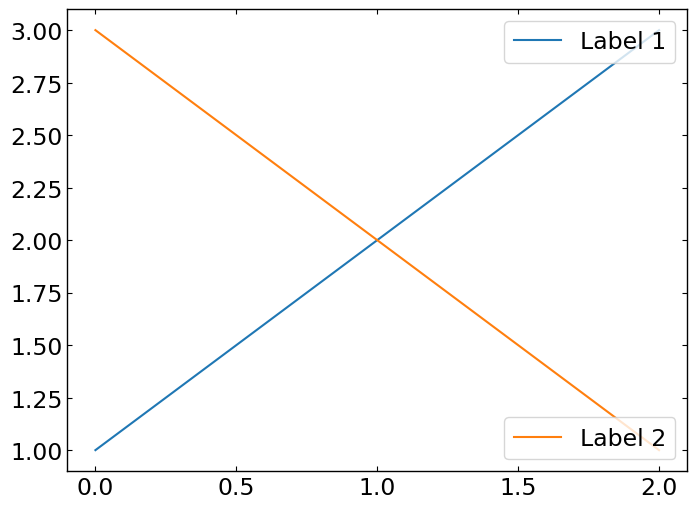

In [37]:
import matplotlib.pyplot as plt

p1, = plt.plot([1,2,3], label='test1')
p2, = plt.plot([3,2,1], label='test2')

l1 = plt.legend([p1], ["Label 1"], loc=1)
l2 = plt.legend([p2], ["Label 2"], loc=4) # this removes l1 from the axes

# add l1 as a separate artist to the axes
plt.gca().add_artist(l1)

plt.show()

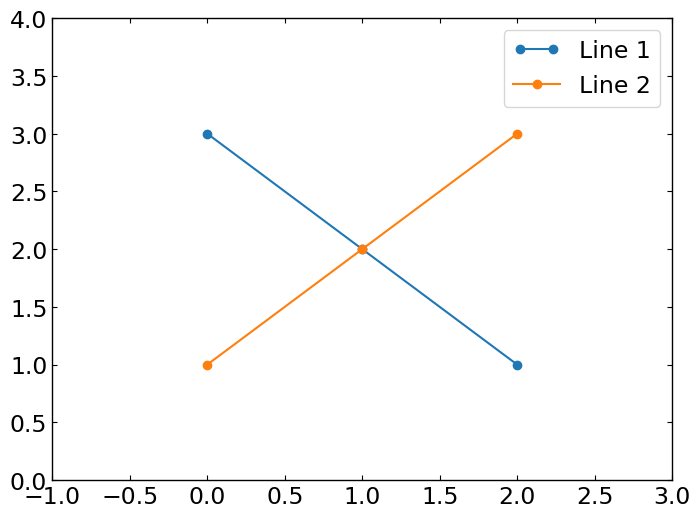

In [38]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D as hdl2D

line1, = plt.plot([3,2,1], marker='o', label='Line 1')
line2, = plt.plot([1,2,3], marker='o', label='Line 2')

plt.axis([-1.,3.,0.,4.])

plt.legend(handler_map={line1: hdl2D(numpoints=2)})

plt.show()

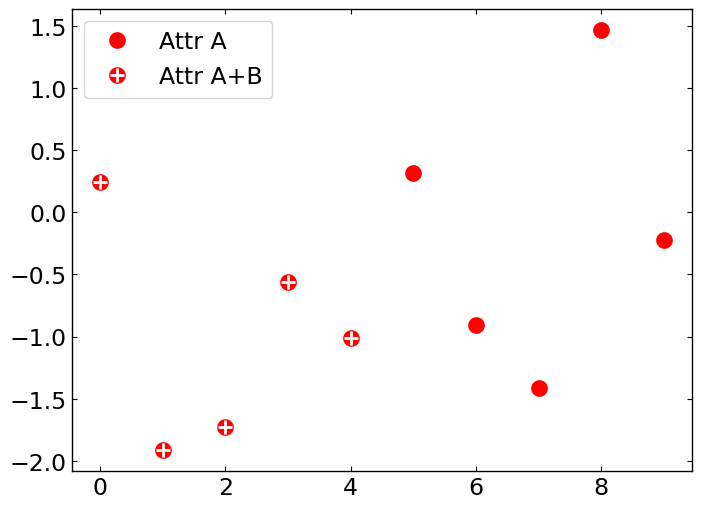

In [39]:
import matplotlib.pyplot as plt
import numpy as np

z = np.random.randn(10)

p1, = plt.plot(z,'ro', ms=10, mfc='r', mew=2, mec='r') # red filled circle
p2, = plt.plot(z[:5],'w+', ms=10, mec='w',mew=2) # white cross

plt.legend([p1,(p1,p2)], ['Attr A', 'Attr A+B'])

plt.show()

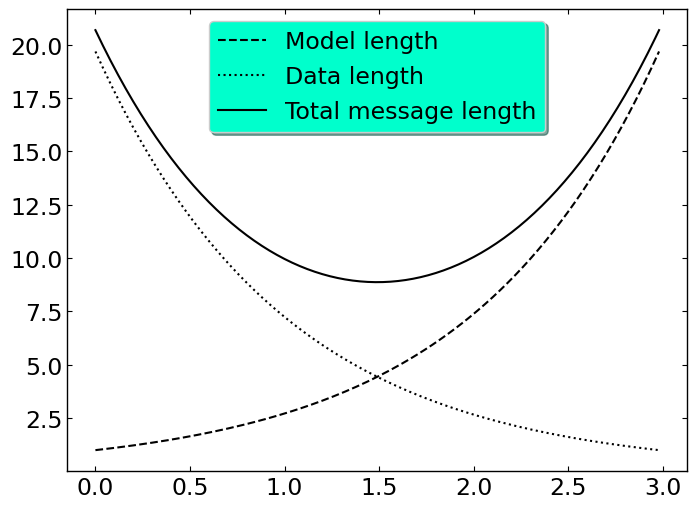

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
plt.plot(a, c, 'k--', label='Model length')
plt.plot(a, d, 'k:', label='Data length')
plt.plot(a, c + d, 'k', label='Total message length')

legend = plt.legend(loc='upper center', shadow=True, fontsize='medium')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

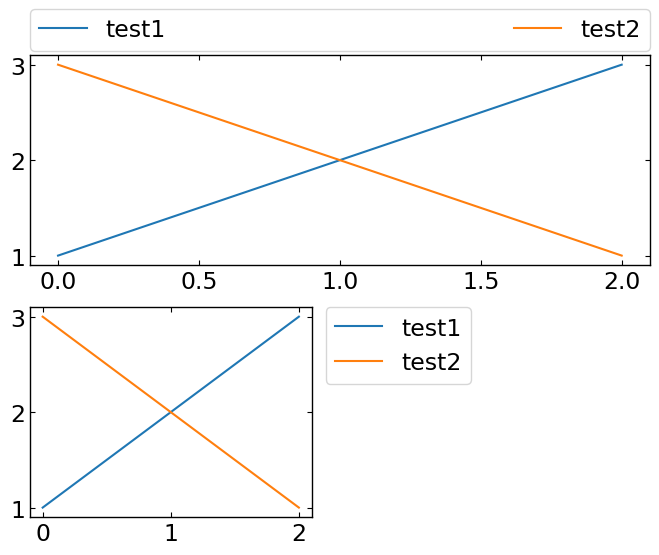

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(211)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'fancy, transparent legends')

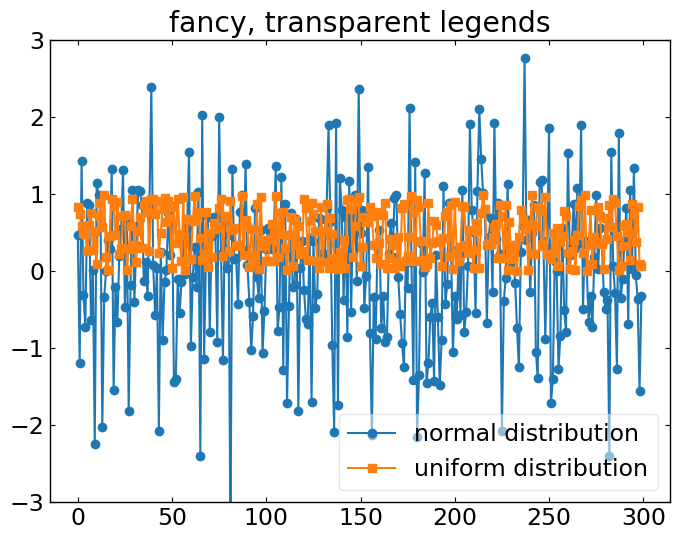

In [42]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
fig, ax = plt.subplots(1)
ax.plot(np.random.randn(300), 'o-', label='normal distribution')
ax.plot(np.random.rand(300), 's-', label='uniform distribution')
ax.set_ylim(-3, 3)
ax.legend(loc='best', fancybox=True, framealpha=0.5)

ax.set_title('fancy, transparent legends')

## legend for contour lines

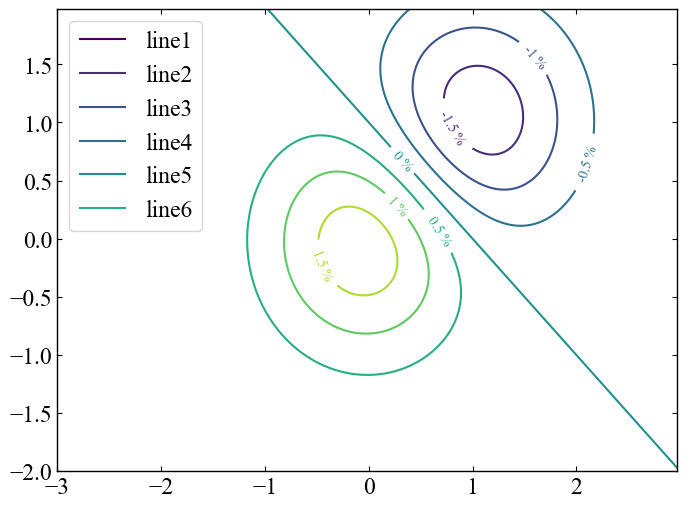

In [3]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2


# This custom formatter removes trailing zeros, e.g. "1.0" becomes "1", and
# then adds a percent sign.
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

labels = ['line1', 'line2','line3','line4',
           'line5', 'line6']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

plt.legend(loc='upper left')

# Annotate 

Text(50, 50, 'Label')

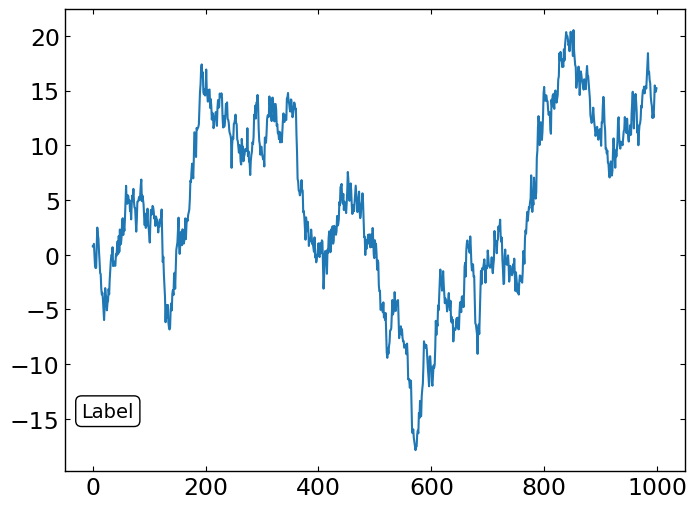

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.random.normal(0, 1, 1000).cumsum()

fig, ax = plt.subplots()
ax.plot(data)
ax.annotate('Label', xy=(50, 50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))


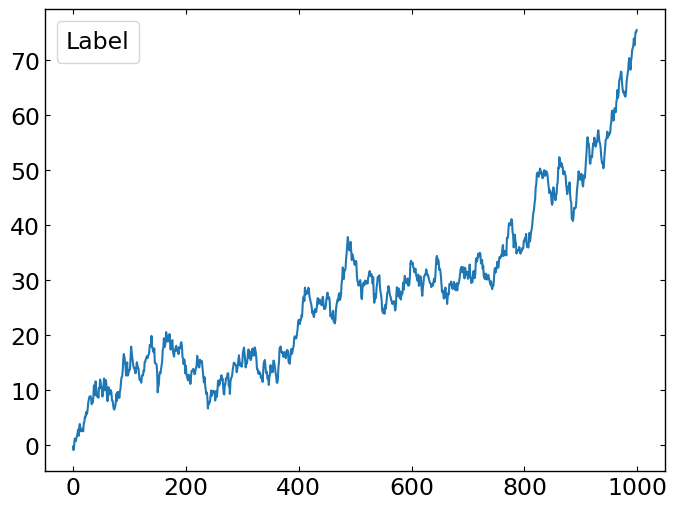

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.random.normal(0, 1, 1000).cumsum()

fig, ax = plt.subplots()
ax.plot(data, label='Label')

leg = ax.legend(handlelength=0, handletextpad=0, fancybox=True)

for item in leg.legendHandles:
    item.set_visible(False)

# plt.legend(markerscale=0)

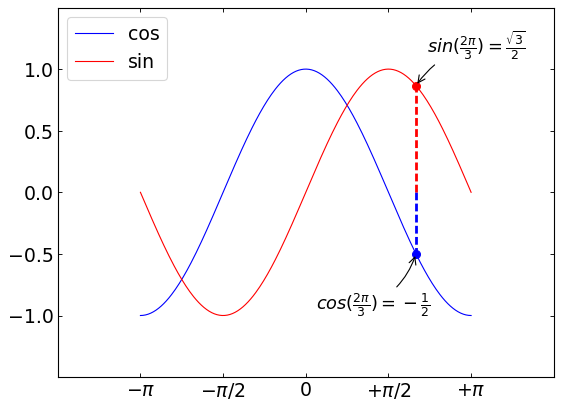

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6), dpi=80)
plt.subplot(1,1,1)

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

plt.plot(x,c, color="blue", linewidth=1., linestyle="-", label="cos")
plt.plot(x,s, color="red", linewidth=1., linestyle="-", label="sin")

#plt.xlim(-4.,4.)
plt.xlim(x.min()*1.5, x.max()*1.5)
#plt.xticks(np.linspace(-4,4,9, endpoint=True))
plt.xticks([-np.pi, -np.pi/2, 0., np.pi/2., np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
#plt.ylim(-1.,1.)
plt.ylim(c.min()*1.5, c.max()*1.5)
plt.yticks(np.linspace(-1,1,5, endpoint=True))

plt.legend(loc='upper left')

t = 2*np.pi/3.
plt.plot([t,t],[0,np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t,], [np.cos(t),], 50, color='blue')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', 
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t,], [np.sin(t),], 50, color='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
            xy=(t, np.cos(t)), xycoords='data',
            xytext=(-90, -50), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


plt.show()

# Text with LaTex

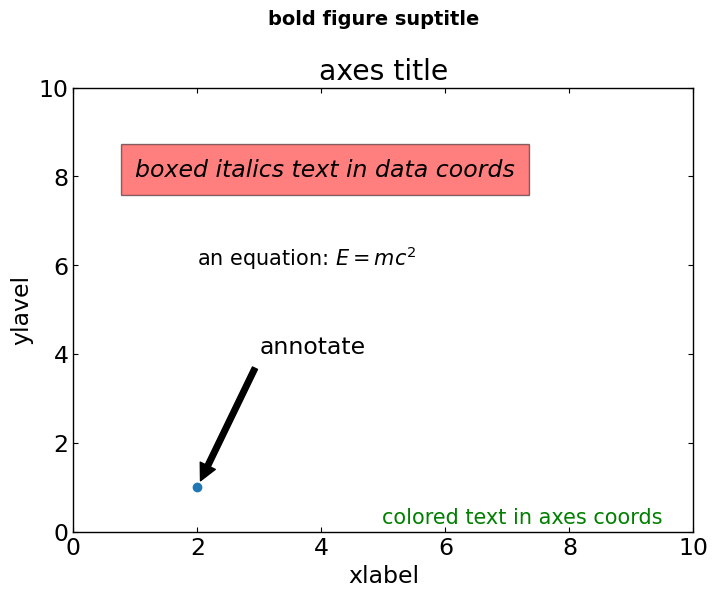

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle',fontsize=14,fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylavel')

ax.text(1,8, 'boxed italics text in data coords', style='italic',
       bbox={'facecolor':'red','alpha':0.5,'pad':10})
ax.text(2,6, r'an equation: $E=mc^2$', fontsize=15)
#ax.text(3,2,unicode('unicode: Institut f\374r Festk\366rperphysik', 'latin-1'))
ax.text(0.95,0.01,'colored text in axes coords',
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes,
       color='green', fontsize=15)

ax.plot([2],[1],'o')
ax.annotate('annotate', xy=(2,1), xytext=(3,4),
           arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0,10,0,10])

plt.show()

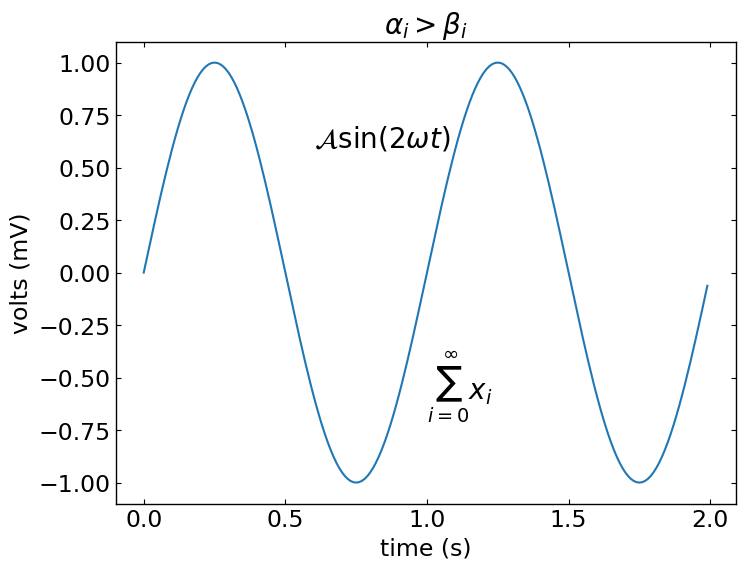

In [21]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.,2.,0.01)
s = np.sin(2.*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1,-0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6,0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
        fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ \infty,\ \partial

/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/pyparsing.py:1316: MatplotlibDeprecationWarning: 
The stackrel mathtext command was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use \genfrac instead.
  ret = func(*args[limit[0]:])


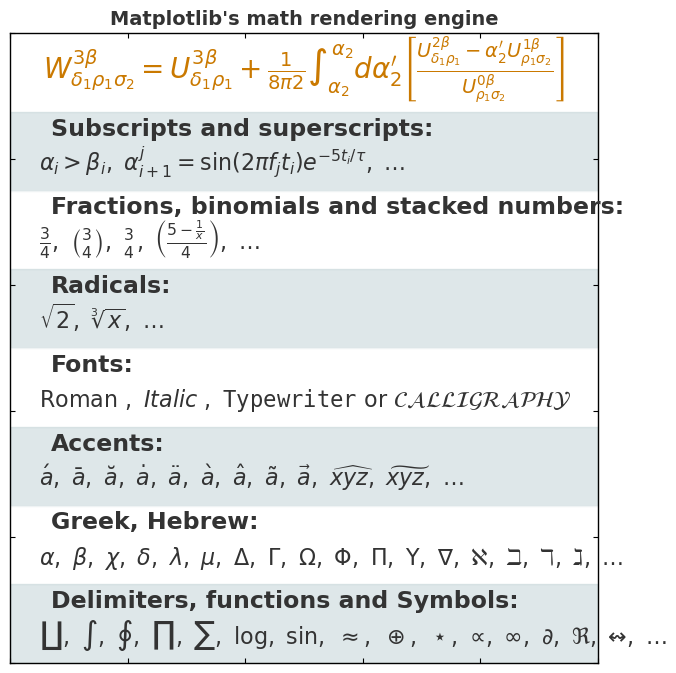

In [22]:
"""
Selected features of Matplotlib's math rendering engine.
"""
from __future__ import print_function
import matplotlib.pyplot as plt
import os
import sys
import re
import gc

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in mpl online documentation.
    mpl_blue_rvb = (191./255., 209./256., 212./255.)
    mpl_orange_rvb = (202/255., 121/256., 0./255.)
    mpl_grey_rvb = (51./255., 51./255., 51./255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
#    plt.axes([0.01, 0.01, 0.98, 0.90], axisbg="white", frameon=True)  # axisbg is no longer available to version 2.0
    plt.axes([0.01, 0.01, 0.98, 0.90], frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = (1. / (n_lines))

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59*line_axesfrac),
                 xycoords='data', color=mpl_orange_rvb, ha='center',
                 fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1. - (i_line)*line_axesfrac
        baseline_next = baseline - line_axesfrac*1.
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3*line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75*line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb,
                     fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()

if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    os.system("pdflatex mathtext_examples.ltx")
else:
    doall()

# Zoom effect

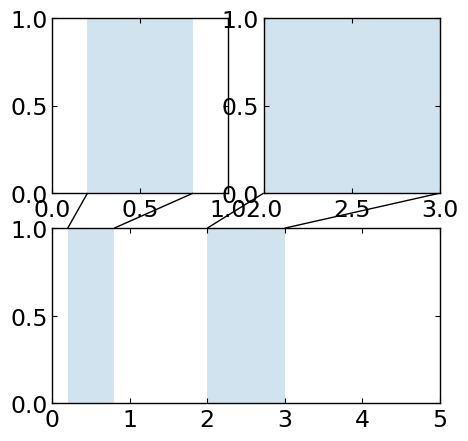

In [45]:
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


import matplotlib.pyplot as plt

plt.figure(1, figsize=(5, 5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(212)
ax2.set_xlim(0, 1)
ax2.set_xlim(0, 5)
zoom_effect01(ax1, ax2, 0.2, 0.8)


ax1 = plt.subplot(222)
ax1.set_xlim(2, 3)
ax2.set_xlim(0, 5)
zoom_effect02(ax1, ax2)

plt.show()

# Scatter

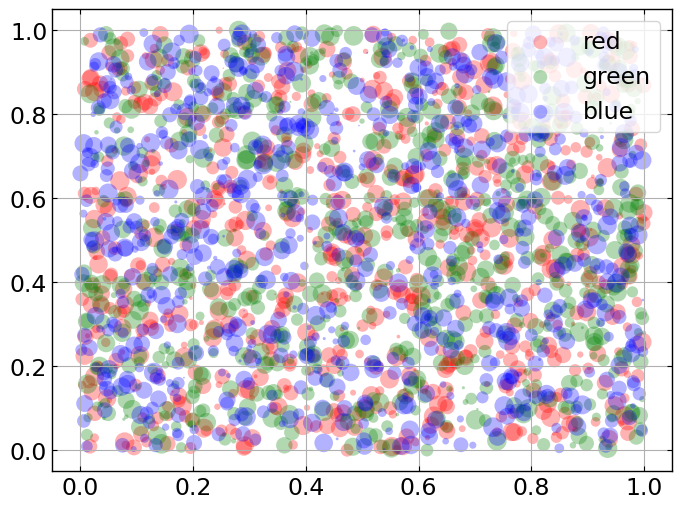

In [47]:
import matplotlib.pyplot as plt
from numpy.random import rand

for color in ['red','green','blue']:
    n = 750
    x, y = rand(2, n)
    scale = 200. * rand(n)
    plt.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

plt.legend()
plt.grid(True)

plt.show()

# Fill

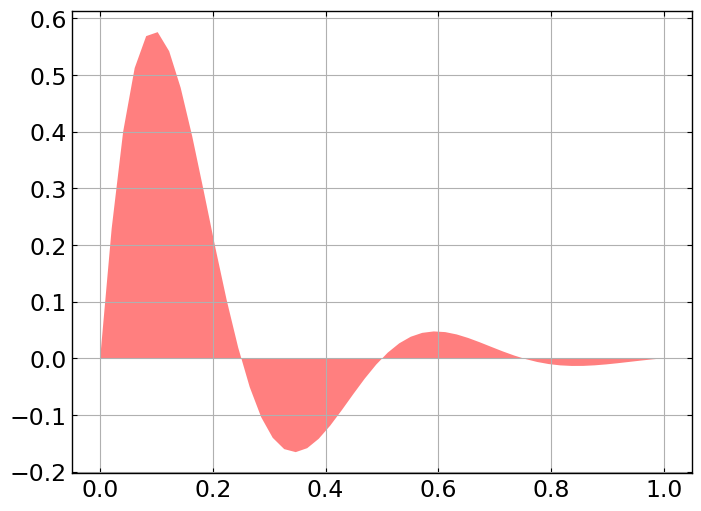

In [48]:
"""
Simple demo of the fill function.
"""
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

plt.fill(x, y, 'r', alpha=0.5)
plt.grid(True)
plt.show()

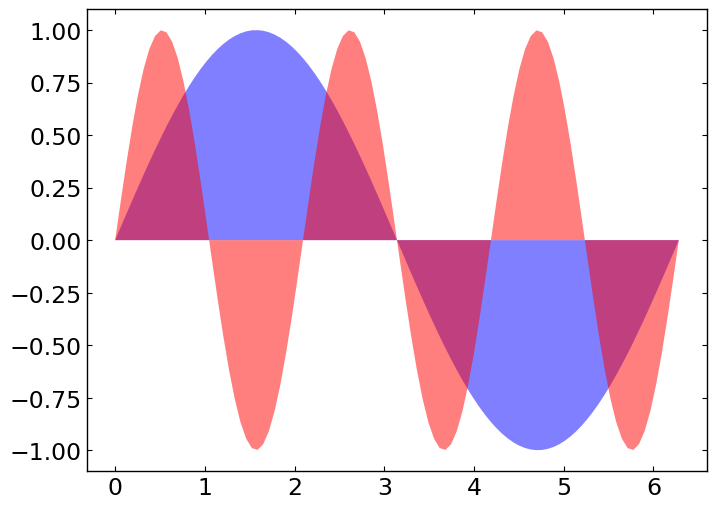

In [49]:
"""
Demo of the fill function with a few features.

In addition to the basic fill plot, this demo shows a few optional features:

    * Multiple curves with a single command.
    * Setting the fill color.
    * Setting the opacity (alpha value).
"""

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(3.*x)

plt.fill(x,y1,'b', x,y2,'r', alpha=0.5)
plt.show()

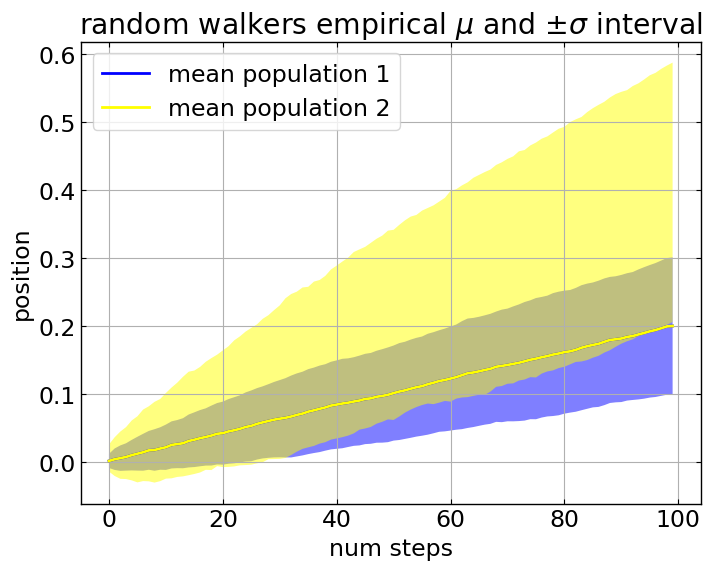

In [50]:
import matplotlib.pyplot as plt
import numpy as np

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
ax.plot(t, mu1, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
ax.set_title('random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

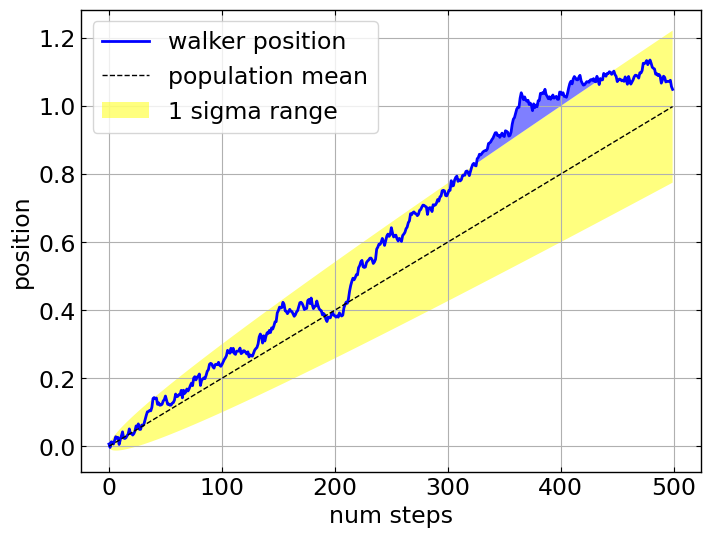

In [51]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, X, lw=2, label='walker position', color='blue')
ax.plot(t, mu*t, lw=1, label='population mean', color='black', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                label='1 sigma range')
ax.legend(loc='upper left',fontsize='medium')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where=X>upper_bound, facecolor='blue', alpha=0.5)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

# Patches

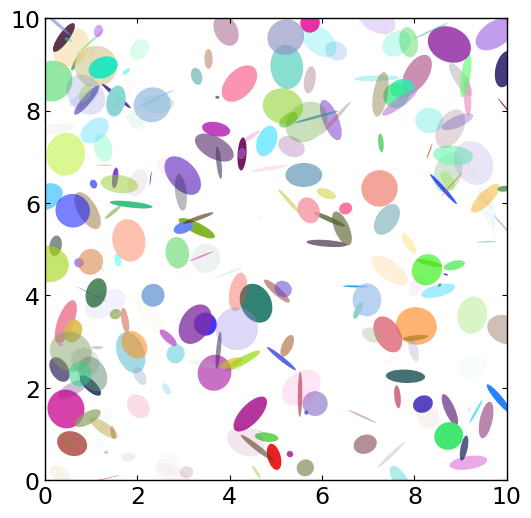

In [52]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)
        for i in range(NUM)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rnd.rand())
    e.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

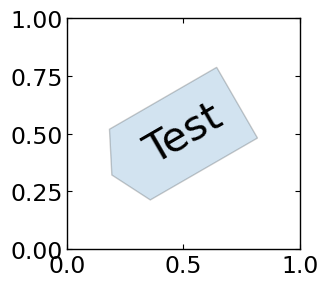

In [53]:
from matplotlib.path import Path
from matplotlib.patches import BoxStyle
import matplotlib.pyplot as plt

# we may derive from matplotlib.patches.BoxStyle._Base class.
# You need to overide transmute method in this case.

class MyStyle(BoxStyle._Base):
    """
    A simple box.
    """

    def __init__(self, pad=0.3):
        """
        The arguments need to be floating numbers and need to have
        default values.
        
         *pad*
            amount of padding
        """

        self.pad = pad
        super(MyStyle, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        Given the location and size of the box, return the path of
        the box around it.

         - *x0*, *y0*, *width*, *height* : location and size of the box
         - *mutation_size* : a reference scale for the mutation.

        Often, the *mutation_size* is the font size of the text.
        You don't need to worry about the rotation as it is
        automatically taken care of.
        """

        # padding
        pad = mutation_size * self.pad

        # width and height with padding added.
        width, height = width + 2.*pad, \
                        height + 2.*pad,

        # boundary of the padded box
        x0, y0 = x0-pad, y0-pad,
        x1, y1 = x0+width, y0 + height

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0-pad, (y0+y1)/2.), (x0, y0),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path


# register the custom style
BoxStyle._style_list["angled"] = MyStyle

plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)
ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center", rotation=30,
        bbox=dict(boxstyle="angled,pad=0.5", alpha=0.2))

del BoxStyle._style_list["angled"]

plt.show()

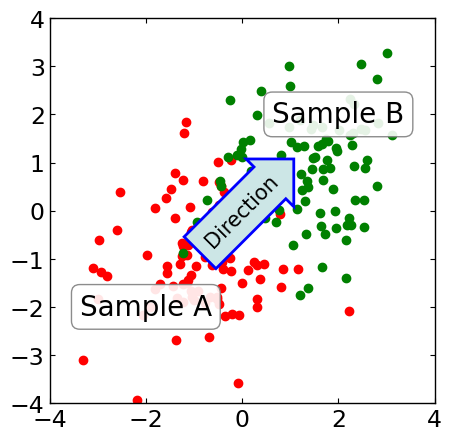

In [54]:
import numpy.random
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(5,5))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)


bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.draw()
plt.show()

<ipython-input-55-5063eb003658>:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.axes_grid import AxesGrid


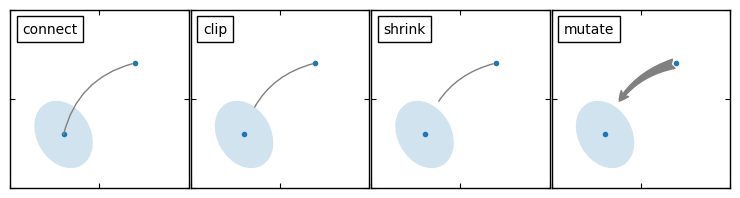

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

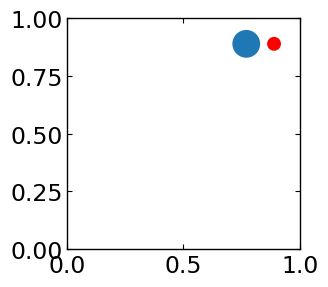

In [56]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)


ada = AnchoredDrawingArea(40, 20, 0, 0,
                          loc=1, pad=0., frameon=False)
p1 = Circle((10, 10), 10)
ada.drawing_area.add_artist(p1)
p2 = Circle((30, 10), 5, fc="r")
ada.drawing_area.add_artist(p2)

ax.add_artist(ada)

plt.show()

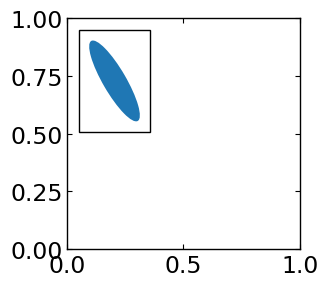

In [57]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

box = AnchoredAuxTransformBox(ax.transData, loc=2)
el = Ellipse((0,0), width=0.1, height=0.4, angle=30) # in data coordinates!
box.drawing_area.add_artist(el)

ax.add_artist(box)

plt.show()

# Path

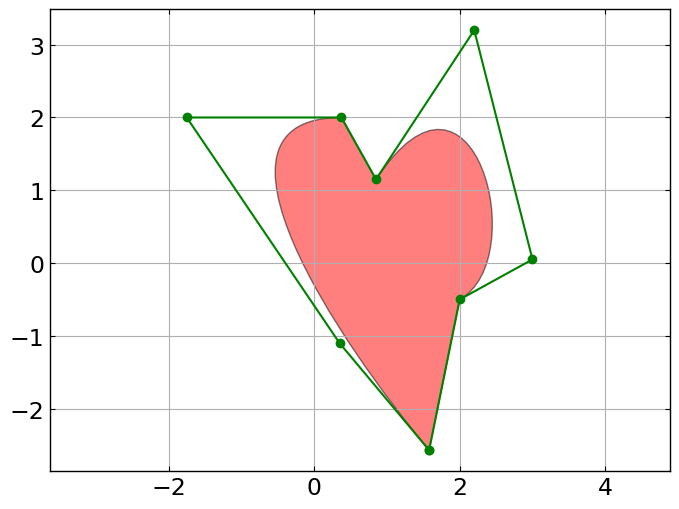

In [58]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

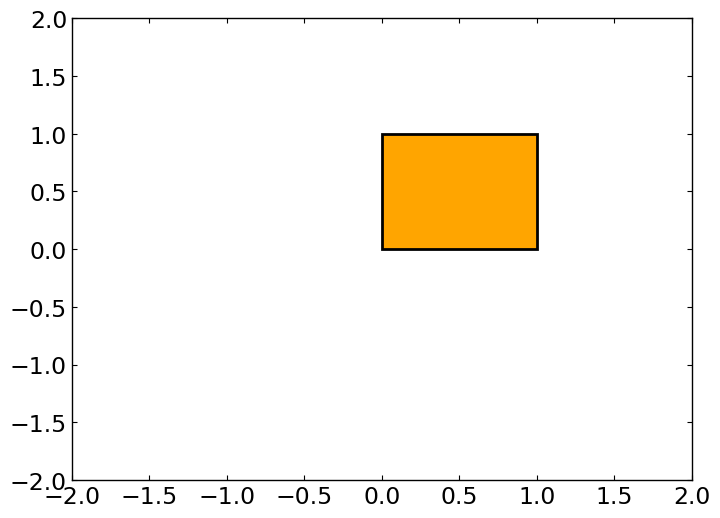

In [59]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

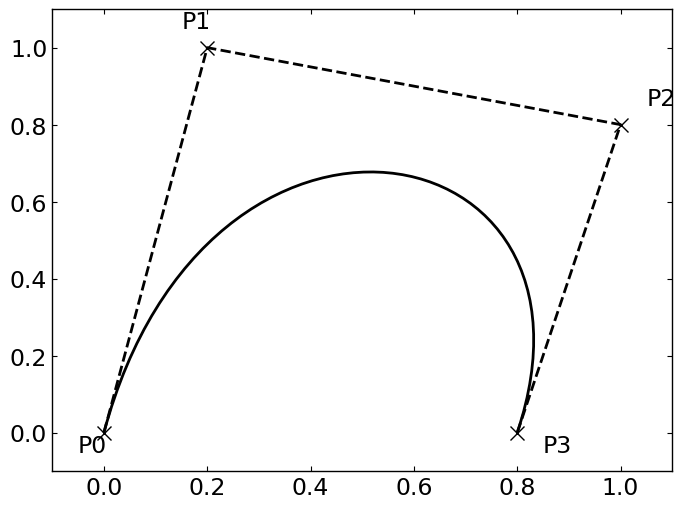

In [60]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.),  # P0
    (0.2, 1.), # P1
    (1., 0.8), # P2
    (0.8, 0.), # P3
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
ax.plot(xs, ys, 'x--', lw=2, color='black', ms=10)

ax.text(-0.05, -0.05, 'P0')
ax.text(0.15, 1.05, 'P1')
ax.text(1.05, 0.85, 'P2')
ax.text(0.85, -0.05, 'P3')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

# Adding a shadow

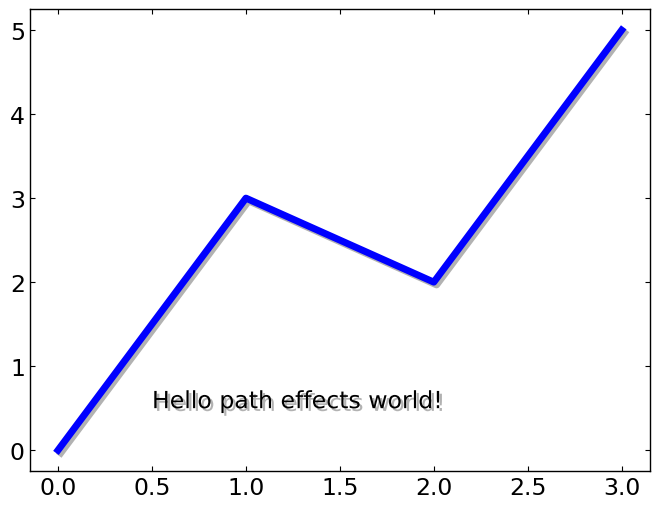

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

text = plt.text(0.5, 0.5, 'Hello path effects world!',
                path_effects=[path_effects.withSimplePatchShadow()])

plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.show()

# Plot3D

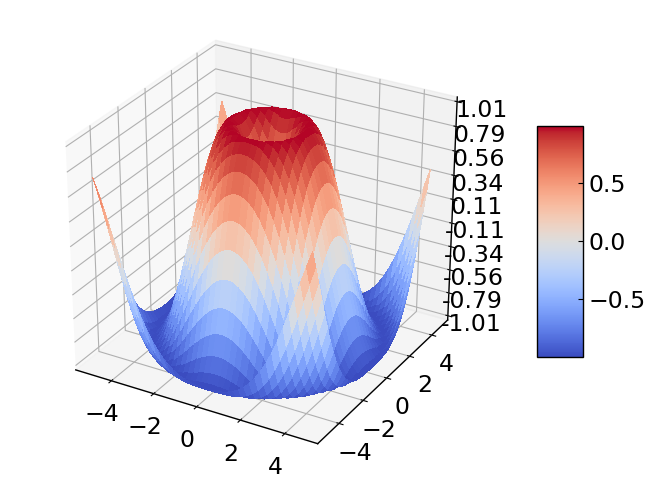

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Transformations

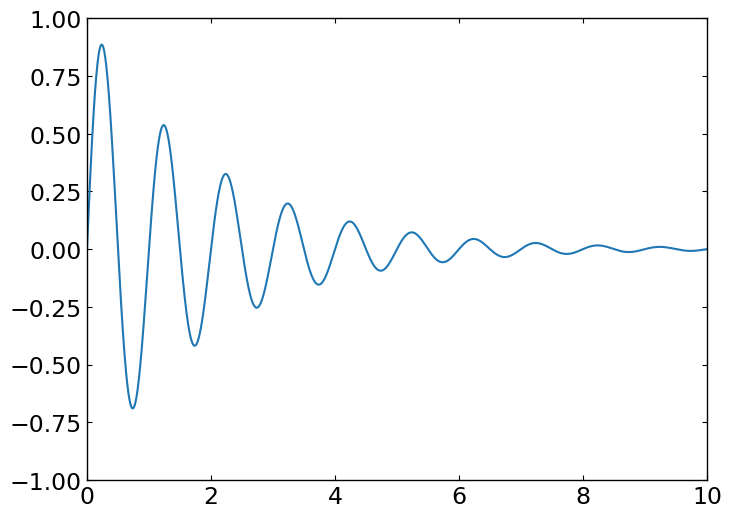

In [64]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

plt.show()

In [65]:
type(ax.transData)

matplotlib.transforms.CompositeGenericTransform

In [66]:
# transform from the data coordinates to display coordinates
ax.transData.transform((5, 0))

array([410., 297.])

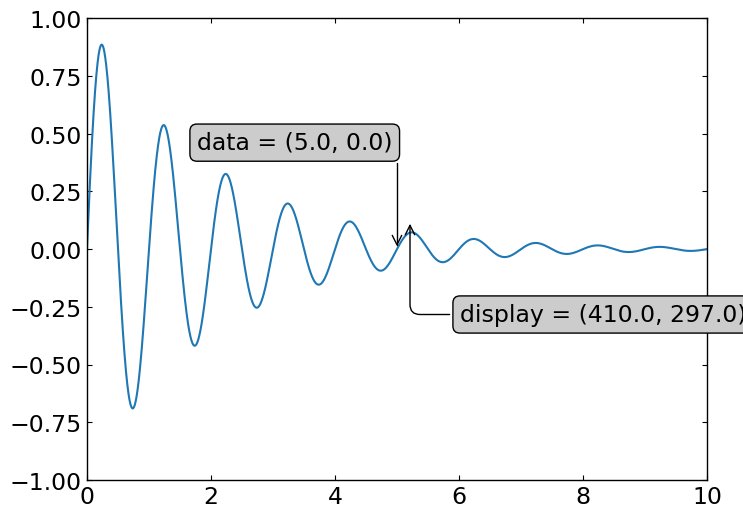

In [70]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

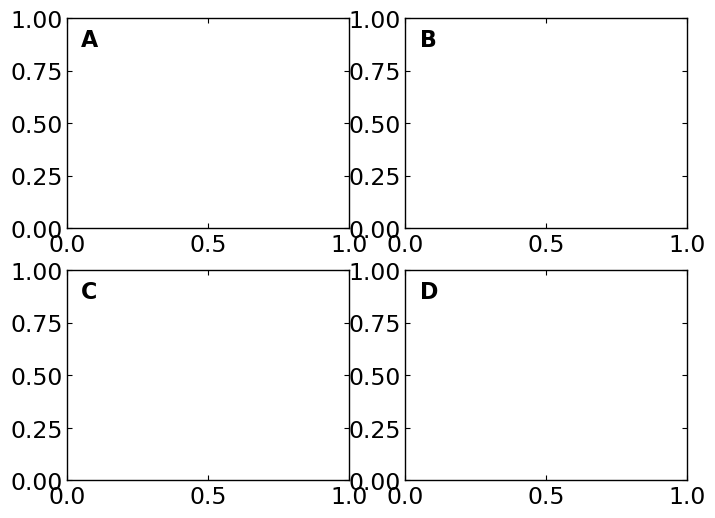

In [68]:
"""
Axes coordinates
"""
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.show()

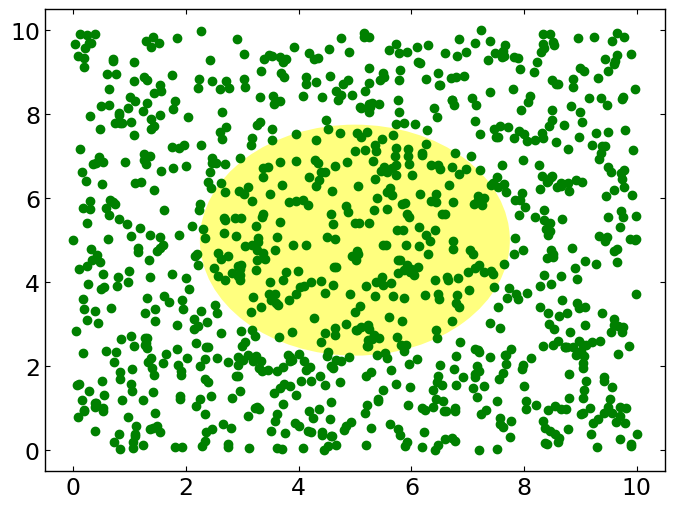

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig = plt.figure()
ax = fig.add_subplot(111)
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go')  # plot some data in data coordinates

circ = patches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                      facecolor='yellow', alpha=0.5)
ax.add_patch(circ)

plt.show()

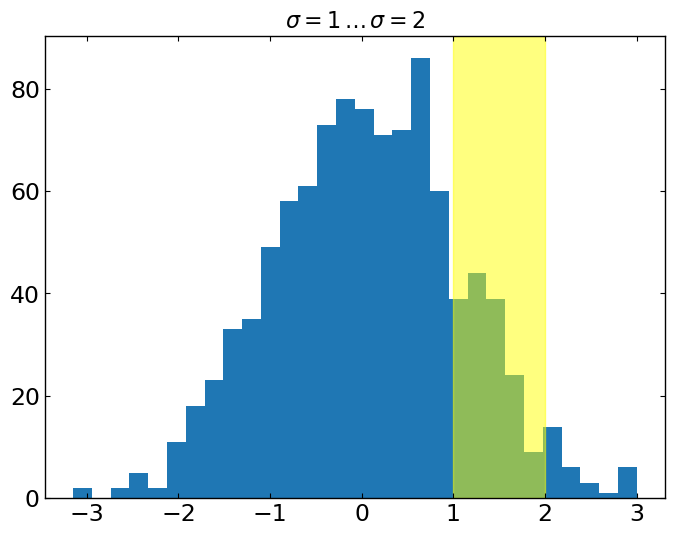

In [71]:
"""
Blended transformations
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.random.randn(1000)

ax.hist(x, 30)
ax.set_title(r'$\sigma=1 \/ \dots \/ \sigma=2$', fontsize=16)

# the x coords of this transformation are data, and the
# y coord are axes
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to
# span from 0..1 in axes coords
rect = patches.Rectangle((1,0), width=1, height=1,
                         transform=trans, color='yellow',
                         alpha=0.5)

ax.add_patch(rect)

plt.show()

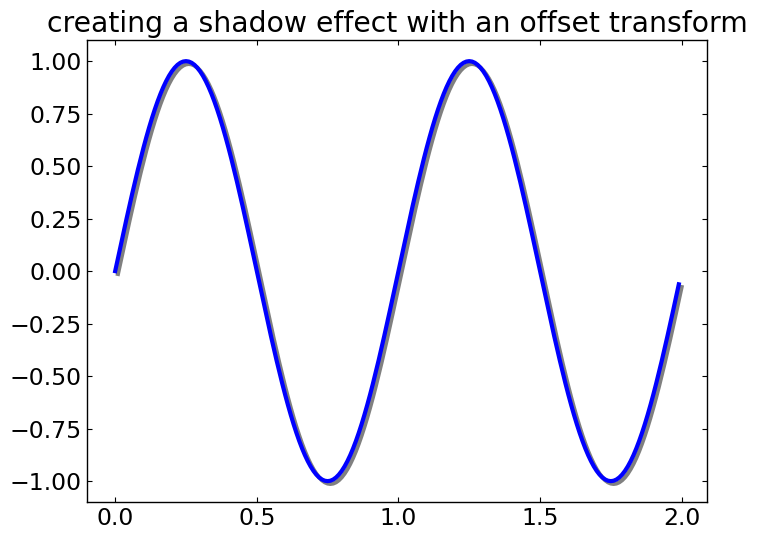

In [72]:
"""
offset transform to creat a shadow effect
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)

# make a simple sine wave
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)
line, = ax.plot(x, y, lw=3, color='blue')

# shift the object over 2 points, and down 2 points
dx, dy = 2/72., -2/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
ax.plot(x, y, lw=3, color='gray',
  transform=shadow_transform,
  zorder=0.5*line.get_zorder())

ax.set_title('creating a shadow effect with an offset transform')
plt.show()